## Лабораторная работа 2 (Visual)

Выполнил: Новицкий Никита (6132-010402D)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import scipy
import plotly as py
import plotly.graph_objs as go

Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

Набор данных: https://www.kaggle.com/datasets/varpit94/apple-stock-data-updated-till-22jun2021

In [2]:
df = pd.read_csv("AAPL.csv")

In [3]:
# посмотрим на размерность нашего датасета
df.shape

(10336, 7)

In [4]:
df.head(5)

Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100453  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095213  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088224  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090408   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.093029   73449600

In [5]:
df.tail(5)

Date        Open        High         Low       Close   Adj Close  \
10331  2021-12-02  158.740005  164.199997  157.800003  163.759995  163.759995   
10332  2021-12-03  164.020004  164.960007  159.720001  161.839996  161.839996   
10333  2021-12-06  164.289993  167.880005  164.279999  165.320007  165.320007   
10334  2021-12-07  169.080002  171.580002  168.339996  171.179993  171.179993   
10335  2021-12-08  172.130005  175.960007  170.699997  175.080002  175.080002   

          Volume  
10331  136739200  
10332  117938300  
10333  107497000  
10334  120405400  
10335  116874200

Данный датасет представляет собой информацию об акциях компании Apple (с 1980-12-12 по 2021-12-08). Датасет содержит 7 колонок, категориальных признаков нет, поэтому мы сгенерируем его самостоятельно.

Описание колонок:
Date - дата

Open - цена акции на момент открытия в один из дней

High - самая высокая цена акции на момент торгов в один из дней

Low - самая низкая цена акции на момент торгов в один из дней

Close - цена акции на момент закрытия в один из дней

Adj Close - скорректированная цена после закрытия, чтобы отразить стоимость после учета любых корпоративных действий

Volume - количество проданных акций за день

In [6]:
# В качестве индекса будем использовать дату
df = df.set_index("Date")

Сгенерируем категориальный признак. Если цена акции на момент закрытия выше, чем на момент открытия, то присвоим значение роста иначе будет значения падения цены акции

In [7]:
df["Rise/Fall"] = df.apply(lambda x: "Rise" if x["Close"] > x["Open"] else "Fall", axis=1)

In [8]:
# Смотрим результат (выберем пять случайных записей)
df.sample(5)

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
1991-12-26   0.470982   0.491071   0.466518   0.489955   0.401075  134500800   
2006-06-20   2.057500   2.083929   2.046071   2.052500   1.759742  672974400   
2012-01-23  15.095357  15.301786  15.082143  15.264643  13.087377  306062400   
1993-04-20   0.435268   0.448661   0.430804   0.446429   0.369438  240049600   
2002-07-24   0.255893   0.271786   0.254464   0.271429   0.232714  406593600   

           Rise/Fall  
Date                  
1991-12-26      Rise  
2006-06-20      Fall  
2012-01-23      Rise  
1993-04-20      Rise  
2002-07-24      Rise

Каждый график необходимо снабдить комментарием

1 Matplotlib

1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab

1.2 Построить несколько суб-графиков на одном графике используя .subplot.

Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом. Хотя бы в одном графике подпишите оси. Во всех графиках подписать название графика.

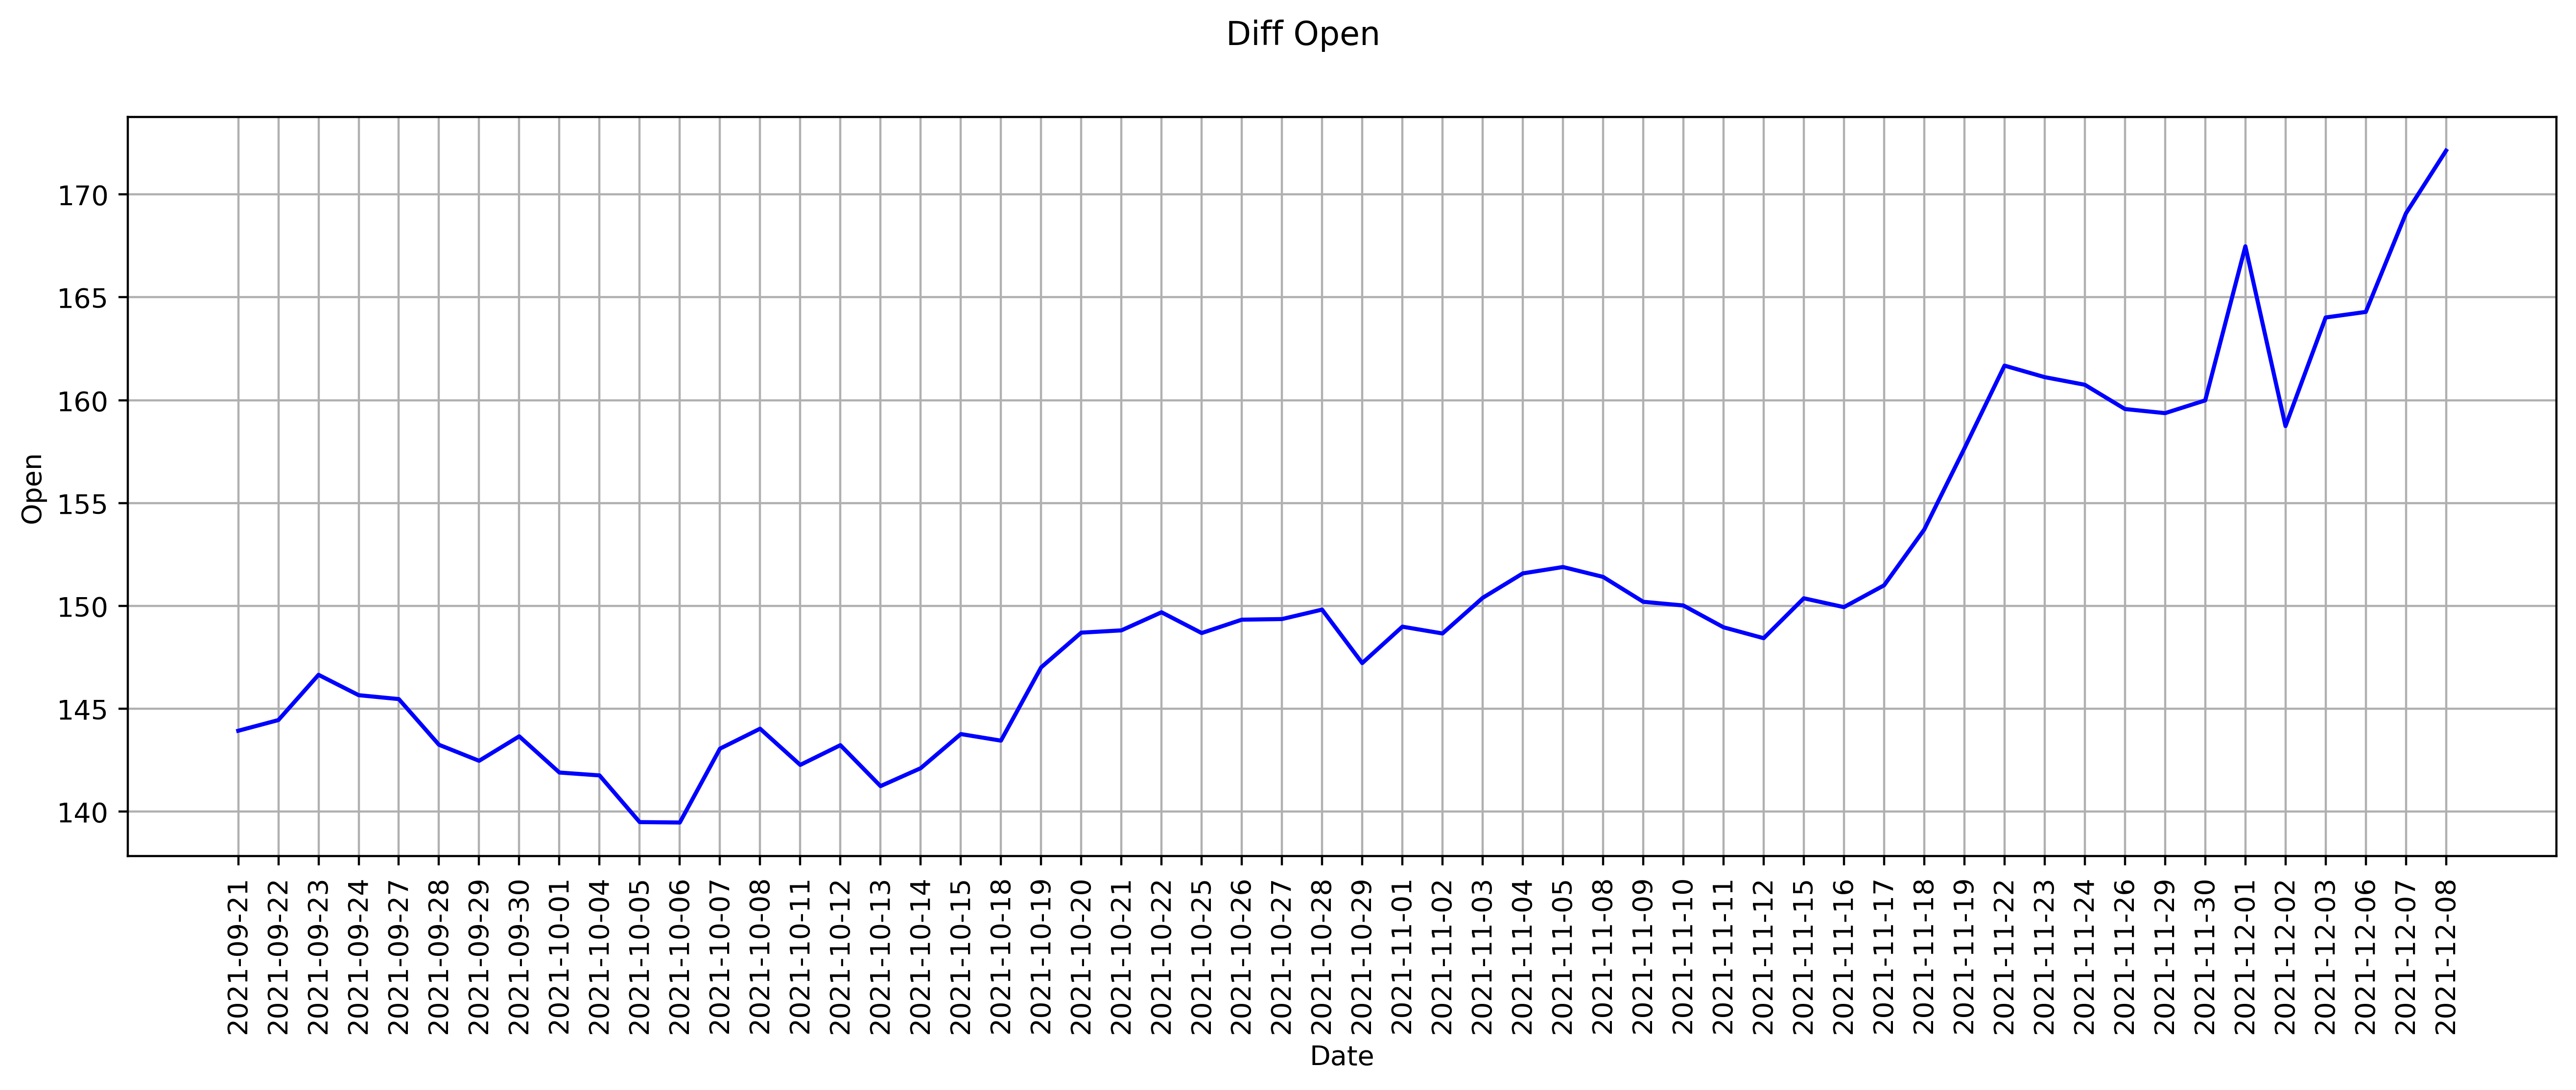

In [9]:
# Выведем график изменения цены на момент открытия торгов с 2021-09-21 по 2021-12-08
plt.figure(figsize=(16,5), dpi=400)
plt.plot(df["Open"][10280:], c="blue")
plt.suptitle("Diff Open")
plt.ylabel("Open")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

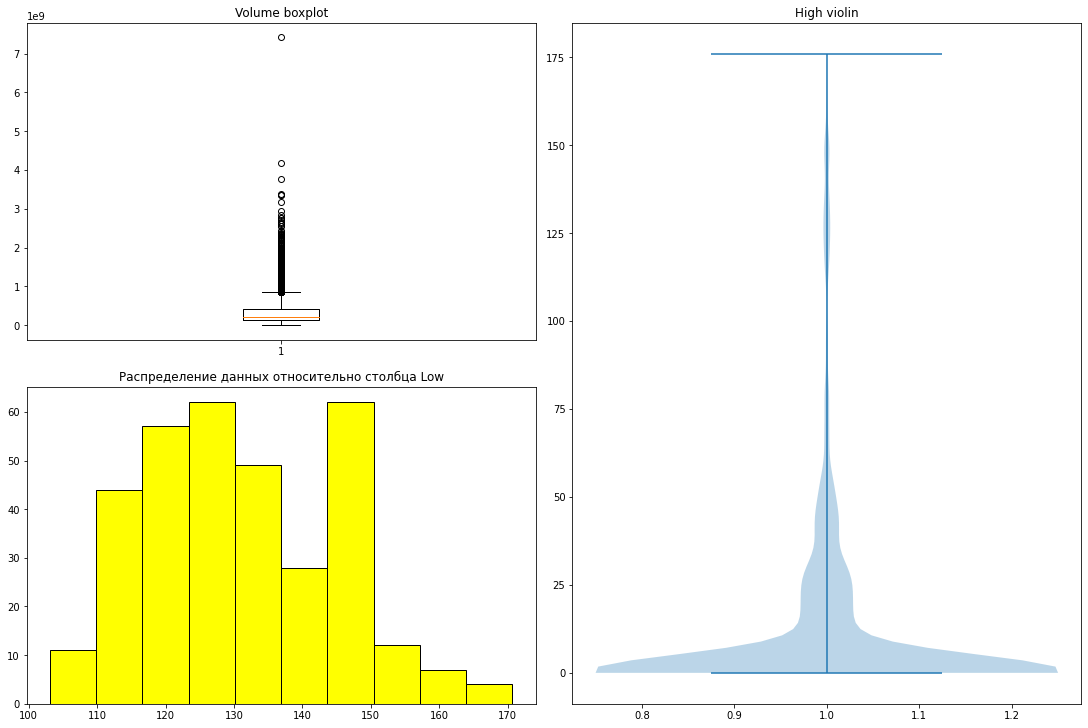

In [10]:
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = gridspec.GridSpec(2, 2, figure=fig)

ax0 = fig.add_subplot(gs[0, :1])
ax0.boxplot(df["Volume"])
ax0.set(title ="Volume boxplot")

ax1 = fig.add_subplot(gs[1, :1])
ax1.hist(df["Low"][10000:], color="yellow", edgecolor="black")
ax1.set(title="Распределение данных относительно столбца Low")

ax2 = fig.add_subplot(gs[:, 1:])
ax2.violinplot(df["High"])
ax2.set(title="High violin")

plt.show()

На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

<AxesSubplot:title={'center':'Adj Close'}, xlabel='[Rise/Fall]'>

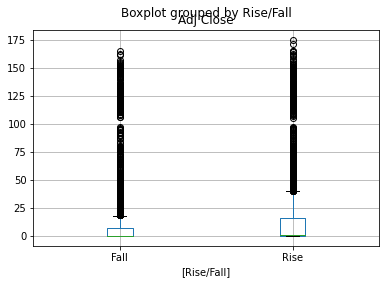

In [11]:
df[["Adj Close", "Rise/Fall"]].boxplot(by="Rise/Fall")

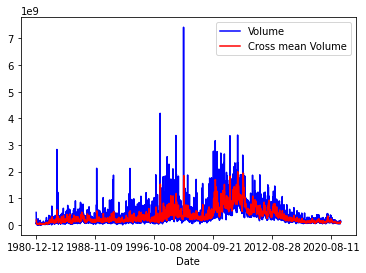

In [12]:
df["Volume"].plot(label="Volume", c="blue")
df["Volume"].rolling(10, min_periods=5).mean().plot(label="Cross mean Volume", c="red")
plt.legend()

<AxesSubplot:ylabel='The ratio of rise to fall'>

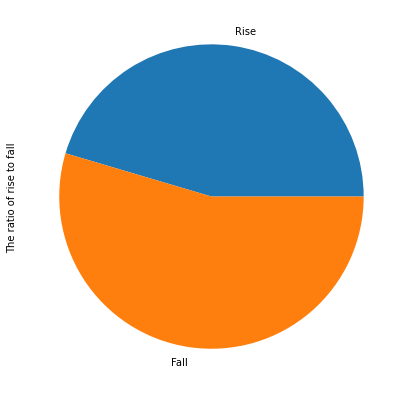

In [13]:
temp_list = list()
temp_list.append(df[df["Rise/Fall"] == "Rise"]["Rise/Fall"].count())
temp_list.append(df[df["Rise/Fall"] == "Fall"]["Rise/Fall"].count())
df_pie = pd.Series(temp_list, index=["Rise", "Fall"], name="The ratio of rise to fall")
df_pie.plot.pie(figsize=(7, 7))

Seaborn 

3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)

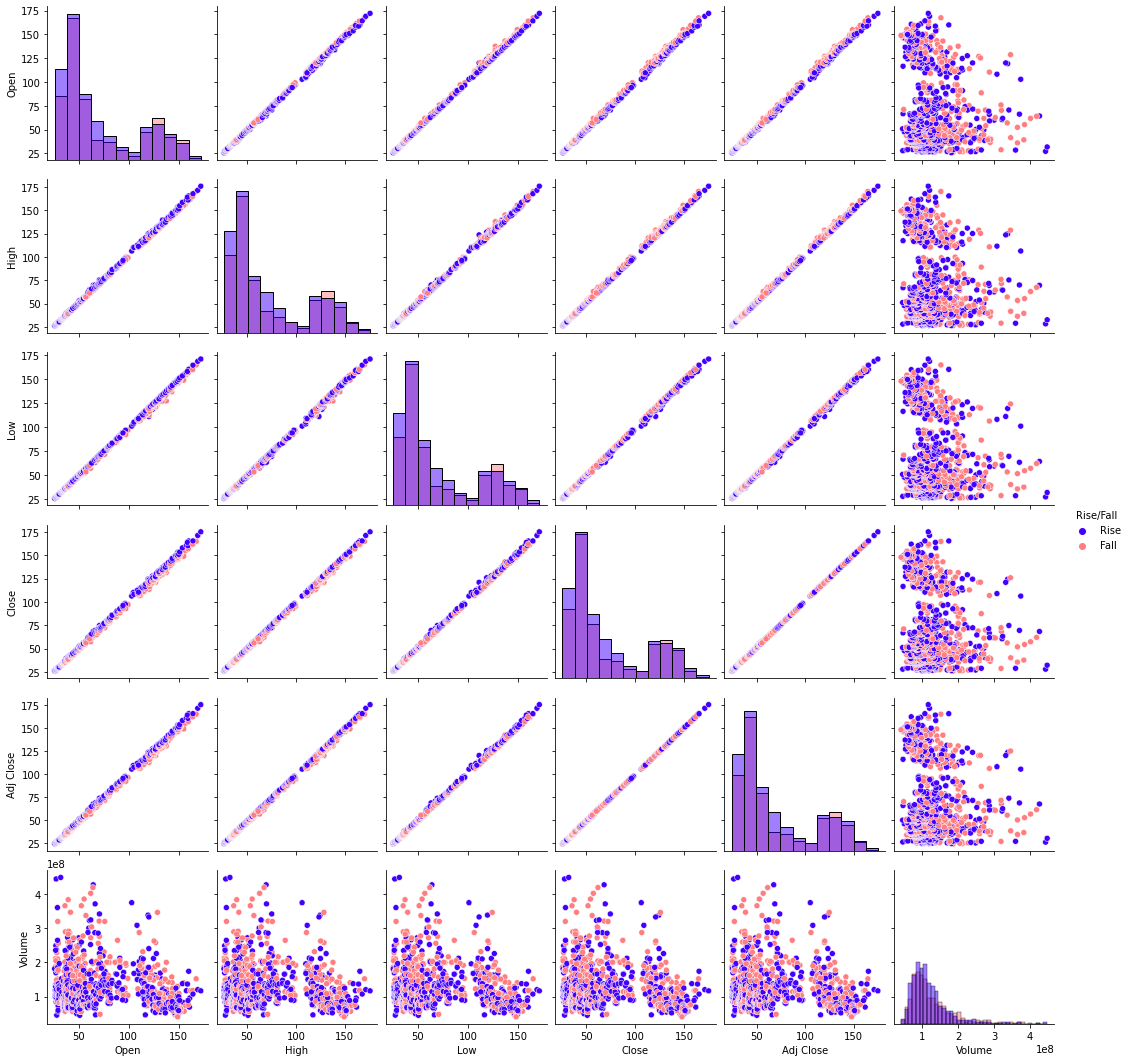

In [14]:
sns.pairplot(df[9000:], hue="Rise/Fall", palette="gnuplot2", diag_kind="hist")

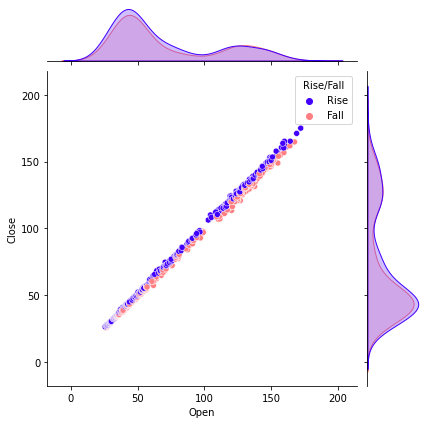

In [15]:
sns.jointplot(data=df[9000:], x="Open", y="Close",  hue="Rise/Fall", palette="gnuplot2")

<AxesSubplot:xlabel='Rise/Fall', ylabel='Open'>

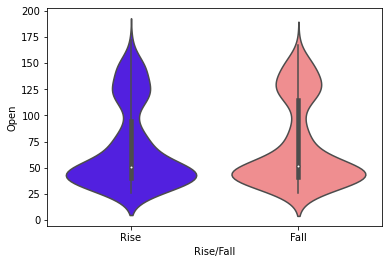

In [16]:
sns.violinplot(data=df[9000:], x="Rise/Fall", y="Open", palette="gnuplot2")

<AxesSubplot:>

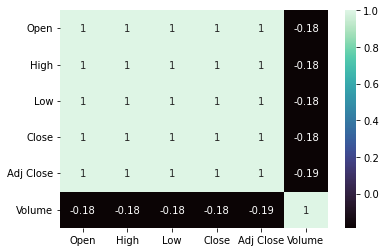

In [17]:
sns.heatmap(df.drop("Rise/Fall", axis=1).corr(), annot = True, cmap="mako")

Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

((array([-3.28018881, -3.02116697, -2.87701055, ...,  2.87701055,
          3.02116697,  3.28018881]),
  array([ 41000000,  45448000,  45903600, ..., 426510000, 443554800,
         447940000])),
 (52005168.682104774, 122372936.15269463, 0.9114195591374117))

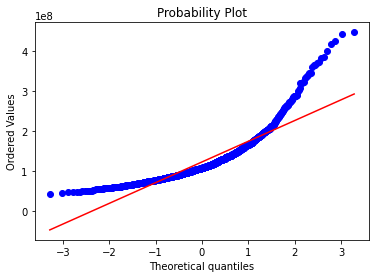

In [18]:
scipy.stats.probplot(df['Volume'][9000:], plot=sns.mpl.pyplot)

Построить любой график (связанный с вашими данными) с помощью plotly

In [19]:
py.offline.iplot([go.Scatter(x=df.index, y=df["Volume"])])